### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist') , 분포
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)


In [73]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [74]:
df['NDate'] = pd.to_datetime(df.Date)
df1 = df.set_index('NDate')
df1.drop(['Date', 'Volume'], axis = 1, inplace = True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

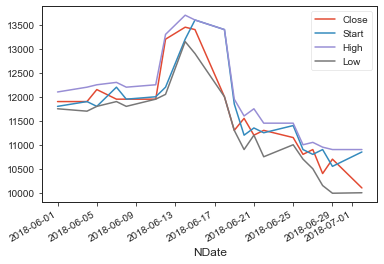

In [75]:
df1.plot() #default가 선 그래프
#각 칼럼은 폭의 차이는 있으나 그래프가 진행되는 추세가 비슷하다

<AxesSubplot:xlabel='NDate'>

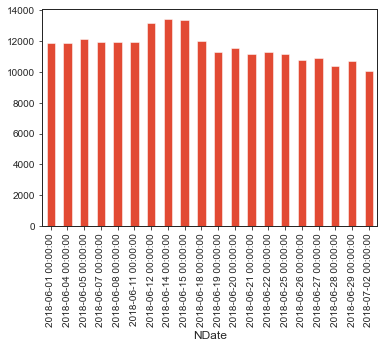

In [76]:
#막대 그래프
df1.Close[::-1].plot(kind = 'bar')

<AxesSubplot:xlabel='NDate'>

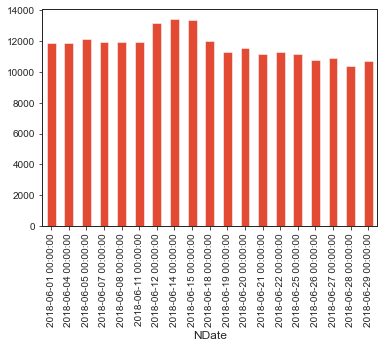

In [77]:
#Q. 6월만을 추출하여 Close 컬럼으로 일별 막대 그래프를 표현하세요.

df1.loc['2018-06', 'Close'][::-1].plot(kind = 'bar')


<AxesSubplot:ylabel='Frequency'>

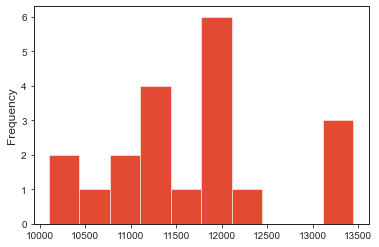

In [78]:
df1.Close.plot(kind = 'hist', bins = 10)

### 과제(7/6)

- df에서 Volume 컬럼의 분포를 탐색하는 히스토그램을 표현하세요.

<AxesSubplot:xlabel='Close', ylabel='Volume'>

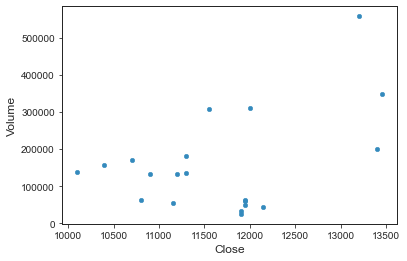

In [79]:
#Close 컬럼과 Volume 컬럼으로 산점도를 표현하세요.(kind = 'scatter')
df.plot(x = 'Close', y = 'Volume', kind = 'scatter')

In [80]:
#상관관계 
#현장에서 데이터 처리할 때는 0.1, 0.2 정도인 애들도 소중하다함
df1.corr()

,Close,Start,High,Low
Close,1.000000,0.856181,0.941201,0.946297
Start,0.856181,1.000000,0.961009,0.921467
High,0.941201,0.961009,1.000000,0.945487
Low,0.946297,0.921467,0.945487,1.000000


In [81]:
df1

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700
2018-06-25,11150,11400,11450,11000
2018-06-22,11300,11250,11450,10750
2018-06-21,11200,11350,11750,11200
2018-06-20,11550,11200,11600,10900


In [82]:
df1.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

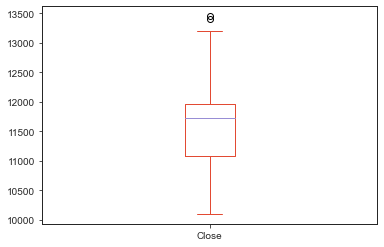

In [83]:
df1.Close.plot(kind = 'box')
#맨 위에 점은 통계적 기준들을 넘어 가는 애들이니까 뭔지 확인해봐야함 

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수(저 네모)
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값(밑에 가로 선)
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값(위에 가로 선)
* 이상치: lower whisker, upper whisker를 벗어나는 값, 그럼 이상치를 구하려면 lower whisker, upper whisker를 먼저 구해야겠지


In [84]:

df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [85]:
Q3 + IQR*1.5

13275.0

In [86]:
#이상치 구해보기 
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df.Close <= (Q1 - IQR*1.5)) | (df.Close >= (Q3 + IQR*1.5))]
abv #이상치

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14



### 과제(7/7)
Start 컬럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.(먼저 박스 플롯으로 이상치 눈으로 대충 확인하고, 이상치 구해보기)


In [87]:
%pwd

'C:\\cakd7\\m2_분석라이브러리활용\\visualization'

In [88]:
import pandas as pd #.. -> 현재 폴더에서 하나 위로 올라가 -> m2_분석라이브러리활용 얘임 
df_auto = pd.read_excel('../pandas/dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 과제(7/7-2)

- mpg 컬럼에 대하여 box plot으로 시각화한 후 이상치 확인 및 그 값을 구하세요.
- fish_multi

In [89]:
fish_multi = pd.read_csv('dataset/4_fm2.csv')
fish_multi.head() 

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='species', ylabel='length'>

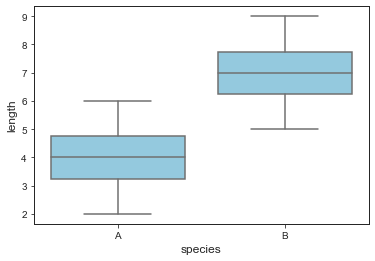

In [90]:
import seaborn as sns
sns.boxplot(x = 'species', y = 'length', data = fish_multi, color = 'skyblue')
#종 b가 더 길고, 종 a는 쪼꼬매 2~6cm 분포잖아 

In [91]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [92]:
#이상치 넣어주는 중 
fish_multi.iloc[5, 1] = 10 #종 A에 대한 이상치
fish_multi.iloc[10,1] = 2 #종 B에 대한 이상치

<AxesSubplot:ylabel='Frequency'>

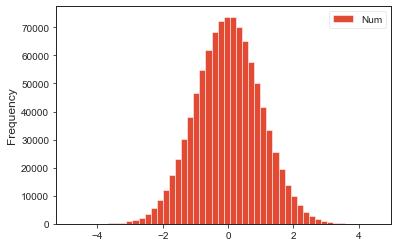

In [93]:
#평균 0, 표준편차 1인 표준정규분포 난수 10000개로 데이터 프레임을 생성해주세요
df = pd.DataFrame(np.random.randn(1000000), columns = ['Num'])
#더 많이 뽑을 수록 그래프가 정규분포와 유사해짐 
df.plot(kind = 'hist', bins = 50)

In [94]:
#평균 10, 표준편차 2, 샘플 10000
from scipy import stats
import numpy as np

np.random.seed(1)
 #평균(loc), 표준편차(scale)를 주면 원하는 개수의 샘플(size)을 뽑아줌
sample1 = stats.norm.rvs(loc = 10, scale = 2, size = 1000000)
df1 = pd.DataFrame(sample1, columns = ['Num'])
df1.head()

,Num
0,13.248691
1,8.776487
2,8.943656
3,7.854063
4,11.730815


<AxesSubplot:ylabel='Frequency'>

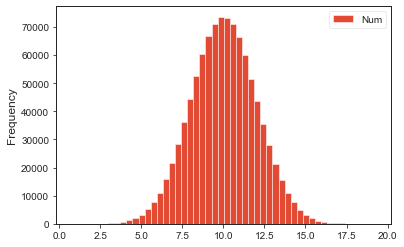

In [95]:
#당근 표준 정규분포 아니니까 평균의 기준이나 폭이 다르지 
df1.plot(kind = 'hist', bins = 50)

In [96]:
#matplotlib style 보는 방법
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [97]:
plt.style.use('ggplot') #실행하고 밑에를 실행하면 달라짐

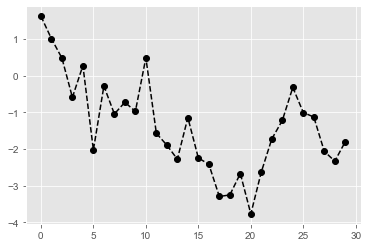

In [98]:
import matplotlib.pyplot as plt 
#np.random.randn - 이렇게 쓰기 귀찮으니까 randn 바로 쓰려고
from numpy.random import randn

np.random.seed(1)

#k - 블랙이래요 
plt.plot(randn(30).cumsum(), linestyle='dashed', color = 'k', marker = 'o')
#누적했으니까 계속 올라가겠지 응?

In [99]:
data = np.random.randn(1000)
print(data[:10]) #앞에 10개만 뽑은것 
cdata = data.cumsum()
cdata[:10]

[-0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
 -1.11731035  0.2344157   1.65980218  0.74204416]


array([-0.69166075, -1.08841428, -1.77558698, -2.62079262, -3.29203875,
       -3.30470335, -4.4220137 , -4.187598  , -2.52779582, -1.78575166])

Text(0.5, 0, 'Stages')

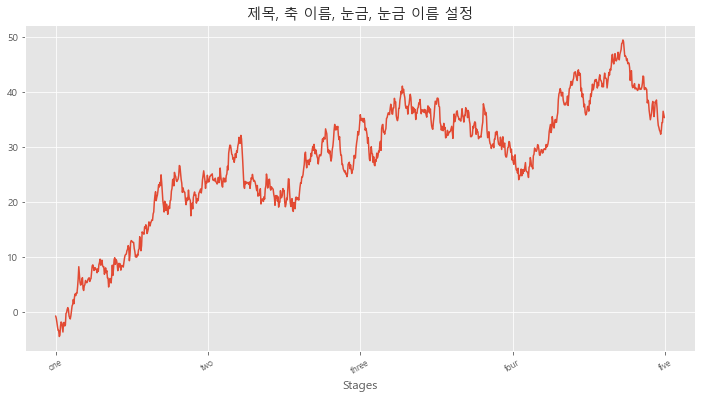

In [101]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc

font_path = 'dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

fig = plt.figure(figsize=(12,6)) #그래프 사이즈 조절 
ax = fig.add_subplot(1,1,1)  #1행1열에서 하나만 그린대 (행,열,개수)인가 #ax는 축
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000]) #눈금 추가
#글자가 길면 서로 겹칠 수도 있으니까 살짝 각도 돌려주고, 글자 크기도 조정 
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30, fontsize='small')

ax.set_title('제목, 축 이름, 눈금, 눈금 이름 설정') #타이틀 붙이기
ax.set_xlabel('Stages')

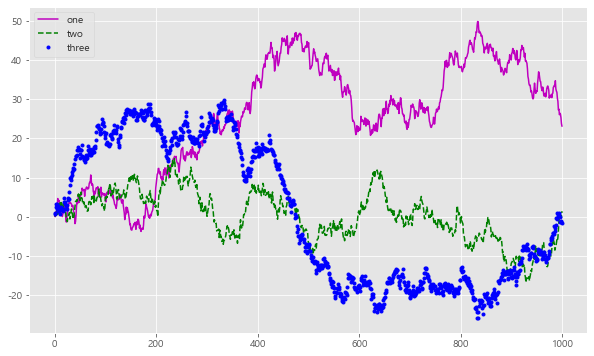

In [102]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'm', label = 'one') #m-마젠타 색?
ax.plot(randn(1000).cumsum(), 'g--', label = 'two') #g- green
ax.plot(randn(1000).cumsum(), 'b.', label = 'three') #b- blue

plt.legend(loc = 'best') #범례(legend),  loc = best -> 범례위치는 니가 알아서 좋은 곳해라

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

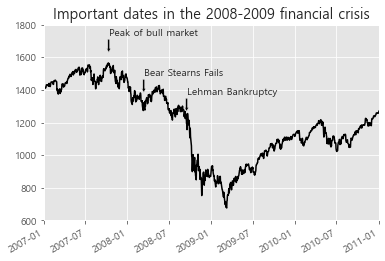

In [103]:
# 주석과 글자는 text, arrow, annotate 함수를 이용하여 추가
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('dataset/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')


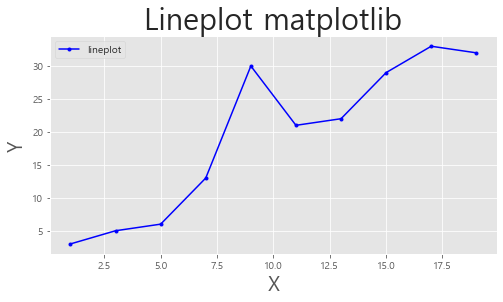

In [104]:
x = np.arange(1, 21, 2)
y = np.array([3, 5, 6, 13, 30, 21, 22, 29, 33, 32])

plt.figure(figsize=(8,4))
plt.plot(x, y, color = 'blue', marker = 'o', markersize = 3)
plt.title('Lineplot matplotlib',size = 30)
plt.xlabel('X', size = 20)
plt.ylabel('Y', size = 20)
plt.legend(labels=['lineplot'])

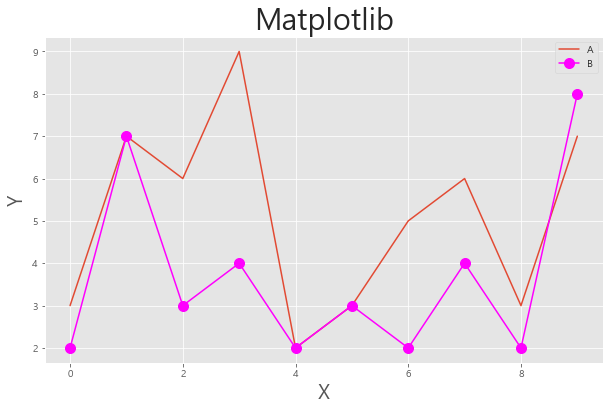

In [106]:
np.random.seed(10)
x = np.arange(10)
y1 = np.random.randint(2,10,size=10)
y2 = np.random.randint(2,10,size=10)
plt.figure(figsize=(10,6))
plt.plot(x,y1)
plt.plot(x,y2, color='magenta', marker='o', markersize=10)  # 'magenta' = 'm'
plt.title('Matplotlib', size=30)
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
plt.legend(labels=['A','B'])

Text(0.5, 1.0, 'Bar Plot')

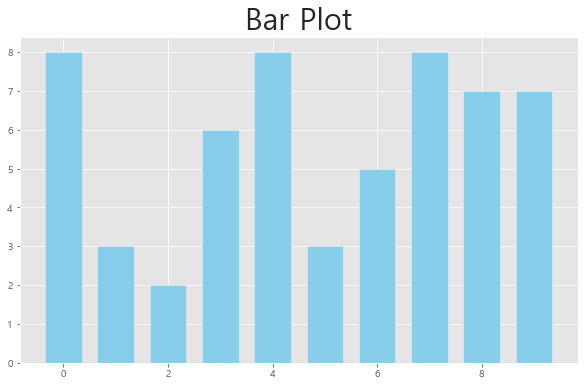

In [108]:
#bar plot(수직)

y = np.random.randint(2, 10, size = 10)
x = range(len(y))
plt.figure(figsize = (10,6))
plt.bar(x, y, width = 0.7, color = 'skyblue') # width = 0.7 - 막대그래프 넓이
plt.title('Bar Plot', size = 30) 

<AxesSubplot:>

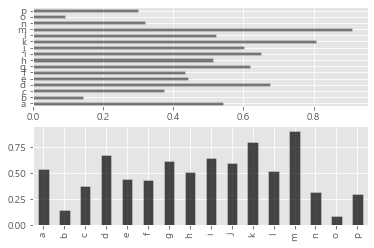

In [109]:
#barh (수평 막대)
import pandas as pd
fig, axes = plt.subplots(2, 1) #rand - 균일분포
data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))
#print(data)

data.plot.bar(ax = axes[1], color = 'k', alpha = 0.7) #alpha 는 투명도
data.plot.barh(ax=axes[0], color ='k', alpha = 0.5)

              A         B         C         D
one    0.113984  0.828681  0.046896  0.626287
two    0.547586  0.819287  0.198948  0.856850
three  0.351653  0.754648  0.295962  0.883936
four   0.325512  0.165016  0.392529  0.093460
five   0.821106  0.151152  0.384114  0.944261
six    0.987625  0.456305  0.826123  0.251374


<AxesSubplot:>

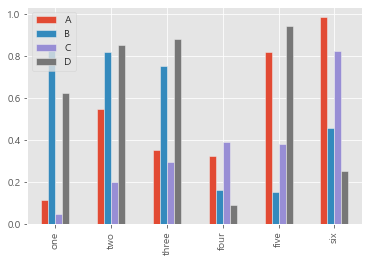

In [110]:
#각 로우의 값을 묶어서 그룹별 막대그래프로 표현
df = pd.DataFrame(np.random.rand(6, 4), index = ['one', 'two', 'three', 'four', 'five', 'six'], columns = ['A', 'B', 'C', 'D'])      

print(df)
df.plot.bar()

<AxesSubplot:>

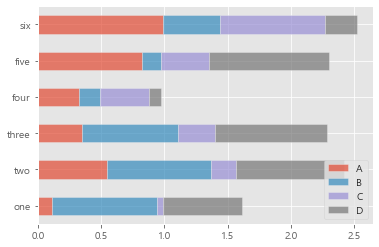

In [111]:
#누적막대그래프 -> stacked = True 스택을 축으로 
df.plot.barh(stacked = True, alpha = 0.7)

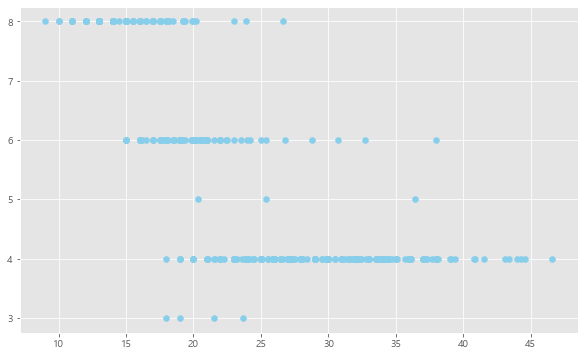

In [112]:
#scatter plot
df_auto = pd.read_excel('../pandas/dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.cylinders #실린더는 4, 6, 8만 있어서 ㅎ 
plt.figure(figsize=(10,6))
plt.scatter(x, y, color = 'skyblue')


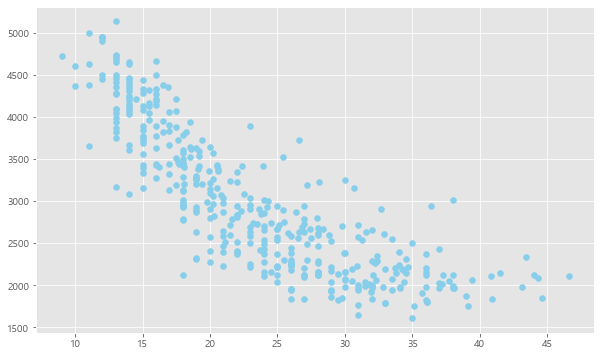

In [113]:
#scatter plot
df_auto = pd.read_excel('../pandas/dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x, y, color = 'skyblue') #반비례 관계 확인 가능함 

In [114]:
df_auto[['mpg', 'weight', 'displacement', 'cylinders']].corr() #반비례 

,mpg,weight,displacement,cylinders
mpg,1.000000,-0.831741,-0.804203,-0.775396
weight,-0.831741,1.000000,0.932824,0.896017
displacement,-0.804203,0.932824,1.000000,0.950721
cylinders,-0.775396,0.896017,0.950721,1.000000


(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

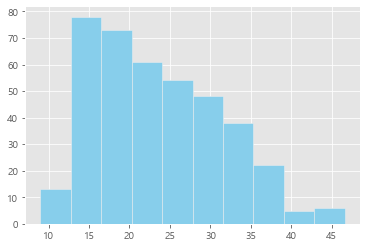

In [115]:
#histogram
plt.hist(x, bins = 10, color = 'skyblue')

<AxesSubplot:>

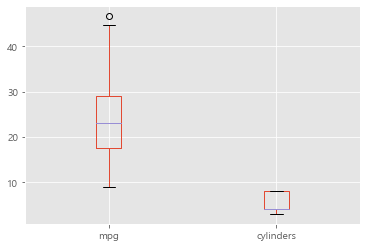

In [116]:
#box plot
df_auto.boxplot(column = ['mpg', 'cylinders'])


In [117]:
#seaborn 내장 테마 : darkgrid, whitegrid, dark, white, ticks
sns.set_style('ticks')

In [118]:
import seaborn as sns 

tips = pd.read_csv('dataset/tips.csv')
print(tips.head(), '\n')

#crosstab 몽미 ?
party_counts = pd.crosstab(tips['day'], tips['size']) #size - 테이블 사이즈 
print(party_counts.head())


party_counts = party_counts.loc[:,2:5] #size = 2,3,4,5 뽑은것 

#Normalize to sum to 1 #전체 합계를 1로 본것 
#전체 합이 1로 정규화된 숫자가 나옴 
party_pcts = party_counts.div(party_counts.sum(1), axis = 0)
party_pcts             #1이 전체 합인게 뭔소린지 모르겠음 

   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4 

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [119]:
#tip 퍼센트랭 
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

#마크업과 마진의 차이 
#100이 있는데 tip이 10이야 원래는 10/100이잖아 - 마진의 개념 
#여기는 90을 분모로 봤어 - 마크업의 개념 
print(tips.head())

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

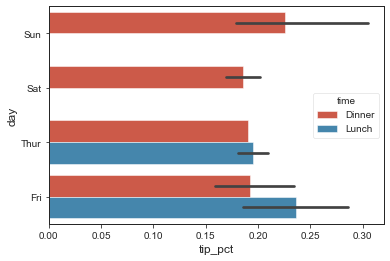

In [120]:
#  orient = 'h' - 수평
#검은선은 오차율의 폭임 뭐 파란색쪽은 오차가 큰것, 클 수록 가변성이 있는거지 , 신뢰구간이라고도해  
sns.barplot(x = 'tip_pct', y = 'day', data = tips, orient = 'h', hue = 'time')

<AxesSubplot:xlabel='size', ylabel='count'>

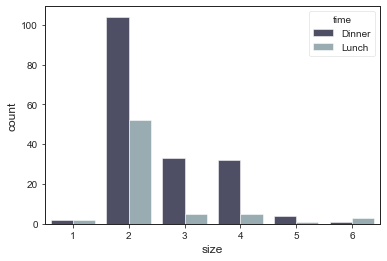

In [121]:
#count의 결과를 막대그래프로 보여주는거 

sns.countplot('size', hue = 'time', data = tips, palette = 'bone')

<AxesSubplot:xlabel='length', ylabel='Density'>

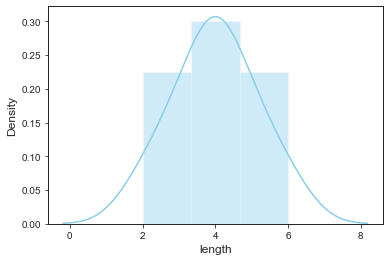

In [122]:
fish_multi = pd.read_csv('dataset/4_fm2.csv')
#종류별 몸 길이 데이터 추출 

length_a = fish_multi.query('species == "A"')['length']
length_b = fish_multi.query('species == "B"')['length']

#안에는 히스토그램, 선그래프는 밀도 , 선그래프 안에 합은 '1'
sns.distplot(length_a, color = 'skyblue')


<AxesSubplot:xlabel='length', ylabel='Density'>

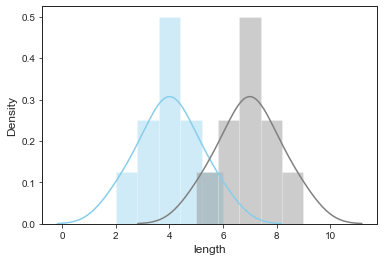

In [123]:

import seaborn as sns
sns.distplot(length_a, bins = 5, color = 'skyblue') 
sns.distplot(length_b, bins = 5 ,color = 'gray')


<AxesSubplot:xlabel='length'>

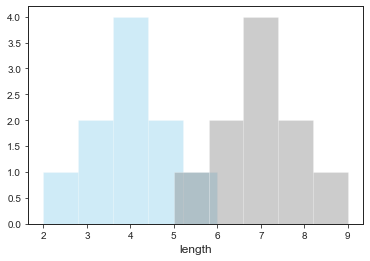

In [124]:
#Kernel density estimation
import seaborn as sns
sns.distplot(length_a, bins = 5, color = 'skyblue', kde = False) 
sns.distplot(length_b, bins = 5 ,color = 'gray', kde = False)


<AxesSubplot:xlabel='species', ylabel='length'>

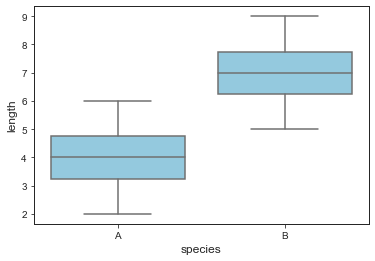

In [125]:
sns.boxplot(x = 'species', y = 'length', data = fish_multi, color = 'skyblue')


<AxesSubplot:xlabel='species', ylabel='length'>

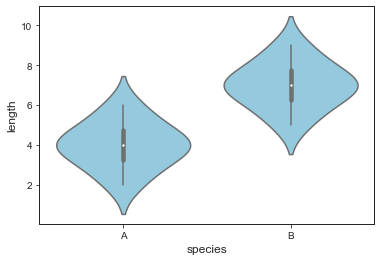

In [126]:
#바이올린 플롯
#저기 반으로 잘라서 고개 돌려서 보면 분포 모양임 그쵸 
#상자 대신 히스토그램을 세로로 세워서 배치한 상자 그림
#어느 부분에 데이터가 집중 되어 있는지 정보 추가 
sns.violinplot(x='species', y='length', data = fish_multi, color = 'skyblue')

In [127]:
cov_data = pd.read_csv('dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


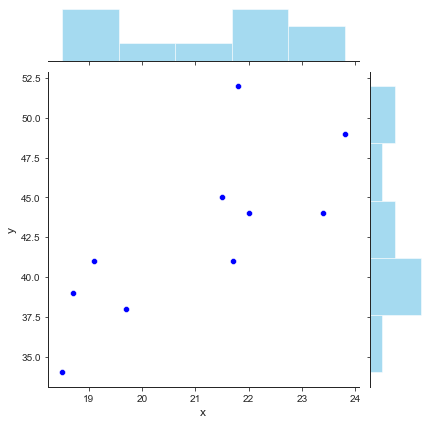

In [128]:

#히스토그램과 산점도 합친거
#joint_kws = {'color':'blue'} - 산점도 색

sns.jointplot(cov_data.x, cov_data.y, joint_kws = {'color':'blue'}, marginal_kws={'color': 'skyblue'})

In [129]:
#lmplot 

df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


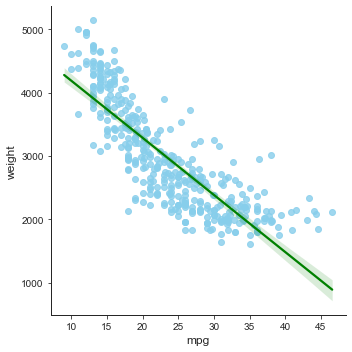

In [130]:
sns.lmplot(x='mpg', y='weight', data=df_auto, scatter_kws={'color': 'skyblue'}, line_kws = {'color':'green'})


<AxesSubplot:xlabel='mpg', ylabel='weight'>

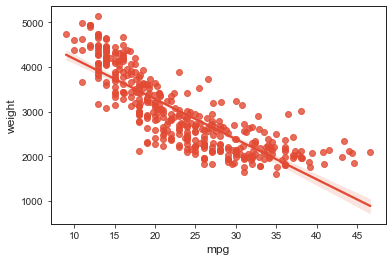

In [131]:
# fit_reg = True -> 회귀선을 넣을거다
sns.regplot(x = 'mpg', y = 'weight', data = df_auto, fit_reg = True)

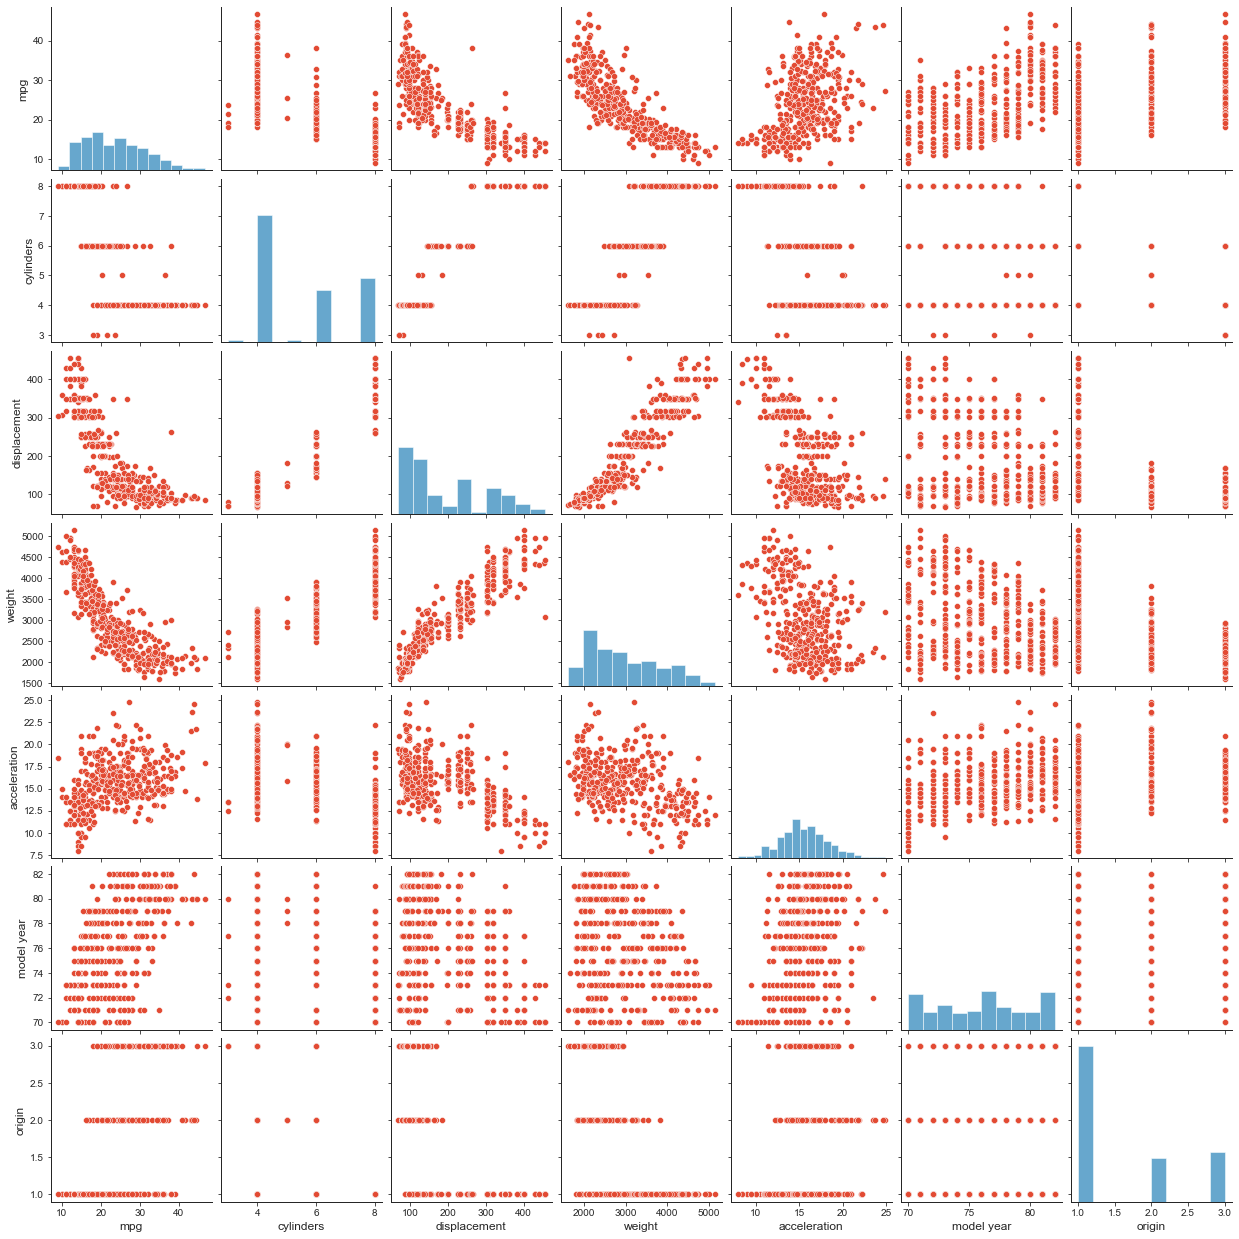

In [132]:
sns.pairplot(df_auto, palette='gray')

Text(0.5, 1.0, 'Heatmap of the Dataset')

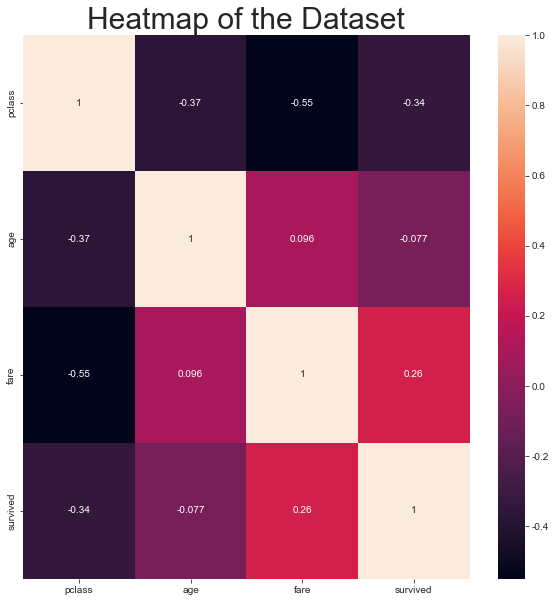

In [133]:
#색깔의 범주로 상관관계를 나타낸것 
#아주 밝은건 양의 상관관계가 강하고, 아주 어두운건 음의 상관관계가 강하고. 
t_df = sns.load_dataset('titanic')
plt.figure(figsize=(10, 10)) #annot = True -> 주석을 달거임 , 네모 안에 상관관계 정도 숫자! 
sns.heatmap(t_df[['pclass', 'age', 'fare', 'survived']].corr(), annot = True)
plt.title('Heatmap of the Dataset', fontsize =30)
#age랑 survived낮은거 보면 age가 지금 저거는 나이를 범주화를 안 시켜서 의미가 별로 없는 데이터잖냐 

In [134]:
table = t_df.pivot_table(index = ['sex'], columns=['class'], values = ['survived'], aggfunc = 'mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

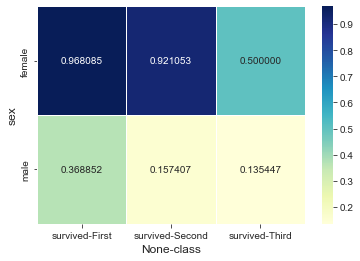

In [135]:
sns.heatmap(table, annot = True, fmt ='f', cmap='YlGnBu', linewidth = .5, cbar = True)
#컬러바, 숫자가 의미하는건 생존률 